## Human Breast Cancer
**Date** : 2021-10-05<br>
**Author** : Alma Andersson<br>
**Description** : This notebook outlines the analysis related to the human breast cancer data.

In [10]:
%load_ext autoreload
%autoreload 2

import os.path as osp
import matplotlib.pyplot as plt
import anndata as ad
import eggplant as eg
import pandas as pd
import scanpy as sc
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
SAVE_MODE = True

In [12]:
CNT_PTHS = ["../data/human-breast-cancer/curated/bcA.h5ad",
            "../data/human-breast-cancer/curated/bcB.h5ad"]

PROP_PTHS = ["../data/human-breast-cancer/sterescope/bcA.tsv",
             "../data/human-breast-cancer/sterescope/bcB.tsv"]

RES_DIR = "../../res/analysis/human-breast-cancer/"

In [13]:
adatas = [ad.read_h5ad(p) for p in CNT_PTHS]
props = [pd.read_csv(p,sep="\t",header = 0,index_col = 0) for p in PROP_PTHS]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


add proportion estimates

In [14]:
for k in range(len(adatas)):
    _tmp = props[k]
    _tmp.index  = adatas[k].obs.index
    _tmp.iloc[:,:] = (_tmp.values - _tmp.values.mean(axis=0)) / _tmp.values.std(axis=0)
    adatas[k].obsm["stereoscope"] = _tmp

adatas = {"bcA":adatas[0],"bcB":adatas[1]}

inspect anndata object

In [15]:
for a in adatas.values():
    sc.pp.filter_cells(a,min_counts=100)
    eg.pp.default_normalization(a,min_cells = 0.1)
    sc.pp.pca(a,n_comps=250)
    print(a)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3798 × 11993
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'curated_landmarks', 'spatial', 'log1p', 'pca'
    obsm: 'spatial', 'stereoscope', 'X_pca'
    varm: 'PCs'


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3986 × 11801
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'curated_landmarks', 'spatial', 'log1p', 'pca'
    obsm: 'spatial', 'stereoscope', 'X_pca'
    varm: 'PCs'


In [46]:
cum_expl_var[20-1]

0.07137042

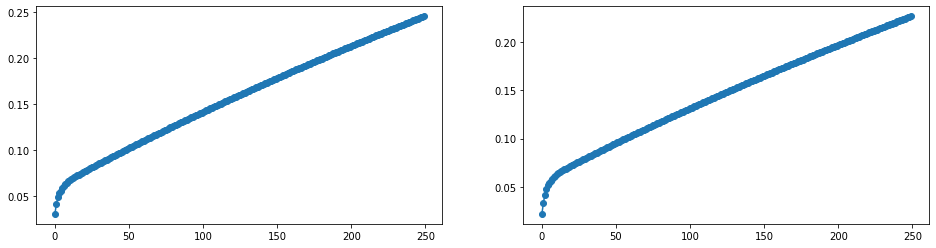

In [44]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize = (16,4))
for n,(k,a) in enumerate(adatas.items()):
    cum_expl_var = np.cumsum(a.uns["pca"]["variance_ratio"])
    xs = np.arange(len(cum_expl_var))
    ax[n].plot(xs,cum_expl_var,"o-")